# 시계열 수치입력 수치예측 모델
- 코사인 데이터를 학습시킨 후, 코사인 데이터 예측

### 데이터셋 준비

In [1]:
import numpy as np
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

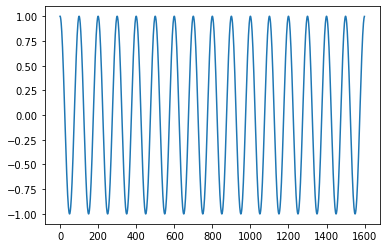

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_x = np.arange(1600)
plot_y = signal_data
plt.plot(plot_x, plot_y)
plt.show()

In [3]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [4]:
from sklearn.preprocessing import MinMaxScaler

look_back = 40

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0,1))
signal_data = scaler.fit_transform(signal_data)

# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

## 1. 다층 퍼셉트론 신경망 모델

In [5]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


### 모델 처리

In [6]:
model1 = Sequential()
model1.add(Dense(32, input_dim=40, activation='relu'))
model1.add(Dropout(0.3))
for i in range(2):
    model1.add(Dense(32, activation='relu'))
    model1.add(Dropout(0.3))
model1.add(Dense(1))
model1.summary()

W0912 07:27:18.002851  5436 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0912 07:27:18.022829  5436 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0912 07:27:18.024825  5436 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0912 07:27:18.041787  5436 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0912 07:27:18.049725  5436 deprecation.py:506

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1312      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [7]:
model1.compile(loss='mean_squared_error', optimizer='adagrad')

W0912 07:27:23.744499  5436 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [8]:
hist1 = model1.fit(x_train, y_train, epochs=200, batch_size=64, validation_data=(x_val, y_val))

W0912 07:27:26.676036  5436 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 760 samples, validate on 360 samples
Epoch 1/200
760/760 [==============================] - 2s 3ms/step - loss: 0.1708 - val_loss: 0.0214
Epoch 2/200
760/760 [==============================] - 0s 75us/step - loss: 0.0686 - val_loss: 0.0277
Epoch 3/200
760/760 [==============================] - 0s 72us/step - loss: 0.0525 - val_loss: 0.0226
Epoch 4/200
760/760 [==============================] - 0s 74us/step - loss: 0.0479 - val_loss: 0.0287
Epoch 5/200
760/760 [==============================] - 0s 77us/step - loss: 0.0413 - val_loss: 0.0416
Epoch 6/200
760/760 [==============================] - 0s 73us/step - loss: 0.0398 - val_loss: 0.0364
Epoch 7/200
760/760 [==============================] - 0s 73us/step - loss: 0.0314 - val_loss: 0.0278
Epoch 8/200
760/760 [==============================] - 0s 73us/step - loss: 0.0335 - val_loss: 0.0262
Epoch 9/200
760/760 [==============================] - 0s 77us/step - loss: 0.0300 - val_loss: 0.0244
Epoch 10/200
760/760 [===============

760/760 [==============================] - 0s 70us/step - loss: 0.0139 - val_loss: 0.0158
Epoch 81/200
760/760 [==============================] - 0s 73us/step - loss: 0.0134 - val_loss: 0.0142
Epoch 82/200
760/760 [==============================] - 0s 66us/step - loss: 0.0145 - val_loss: 0.0114
Epoch 83/200
760/760 [==============================] - 0s 62us/step - loss: 0.0126 - val_loss: 0.0153
Epoch 84/200
760/760 [==============================] - 0s 59us/step - loss: 0.0128 - val_loss: 0.0154
Epoch 85/200
760/760 [==============================] - 0s 68us/step - loss: 0.0130 - val_loss: 0.0169
Epoch 86/200
760/760 [==============================] - 0s 67us/step - loss: 0.0136 - val_loss: 0.0175
Epoch 87/200
760/760 [==============================] - 0s 67us/step - loss: 0.0139 - val_loss: 0.0140
Epoch 88/200
760/760 [==============================] - 0s 67us/step - loss: 0.0145 - val_loss: 0.0123
Epoch 89/200
760/760 [==============================] - 0s 67us/step - loss: 0.0131 - 

760/760 [==============================] - 0s 68us/step - loss: 0.0101 - val_loss: 0.0080
Epoch 160/200
760/760 [==============================] - 0s 68us/step - loss: 0.0112 - val_loss: 0.0103
Epoch 161/200
760/760 [==============================] - 0s 68us/step - loss: 0.0099 - val_loss: 0.0089
Epoch 162/200
760/760 [==============================] - 0s 67us/step - loss: 0.0108 - val_loss: 0.0082
Epoch 163/200
760/760 [==============================] - 0s 70us/step - loss: 0.0108 - val_loss: 0.0094
Epoch 164/200
760/760 [==============================] - 0s 68us/step - loss: 0.0105 - val_loss: 0.0095
Epoch 165/200
760/760 [==============================] - 0s 70us/step - loss: 0.0109 - val_loss: 0.0097
Epoch 166/200
760/760 [==============================] - 0s 66us/step - loss: 0.0100 - val_loss: 0.0093
Epoch 167/200
760/760 [==============================] - 0s 72us/step - loss: 0.0096 - val_loss: 0.0089
Epoch 168/200
760/760 [==============================] - 0s 71us/step - loss: 

### 학습과정 살펴보기

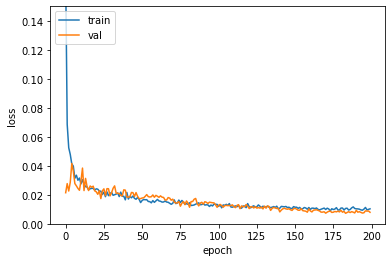

In [9]:
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 모델 평가하기

In [10]:
trainScore = model1.evaluate(x_train, y_train)
print('Train Score: ', trainScore)
valScore = model1.evaluate(x_val, y_val)
print('Validataion Score: ', valScore)
testScore = model1.evaluate(x_test, y_test)
print('Test Score: ', testScore)

760/760 [==============================] - 0s 50us/step
Train Score:  0.007991820260098106
360/360 [==============================] - 0s 44us/step
Validataion Score:  0.00796116931984822
360/360 [==============================] - 0s 44us/step
Test Score:  0.00796116931984822


### 모델 사용하기

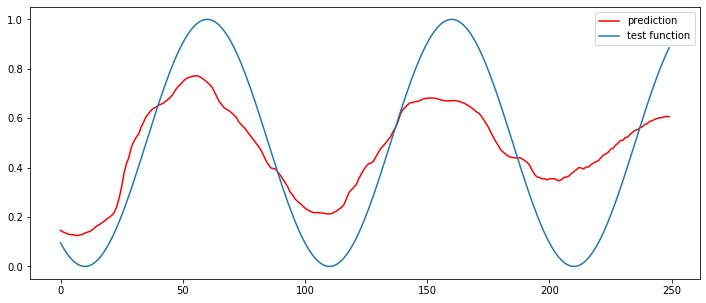

In [11]:
look_ahead = 250
xhat = x_test[0, None]
predictions = np.zeros((look_ahead, 1))
for i in range(look_ahead):
    prediction = model1.predict(xhat, batch_size=64)
    predictions[i] = prediction
    xhat = np.hstack([xhat[:,1:], prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead), predictions, 'r', label='prediction')
plt.plot(np.arange(look_ahead), y_test[:look_ahead], label='test function')
plt.legend()
plt.show()

## 2. 순환신경망 모델

### 데이터셋 전처리

In [12]:
x_train.shape

(760, 40)

In [13]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

### 모델 처리

In [14]:
model2 = Sequential()
model2.add(LSTM(32, input_shape=(None, 1)))
model2.add(Dropout(0.3))
model2.add(Dense(1))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [15]:
model2.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
hist2 = model2.fit(x_train, y_train, epochs=200, batch_size=64, validation_data=(x_val, y_val))

W0912 07:28:49.242195  5436 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 760 samples, validate on 360 samples
Epoch 1/200
760/760 [==============================] - 1s 2ms/step - loss: 0.4751 - val_loss: 0.2704
Epoch 2/200
760/760 [==============================] - 1s 1ms/step - loss: 0.1790 - val_loss: 0.0680
Epoch 3/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0729 - val_loss: 0.0475
Epoch 4/200
760/760 [==============================] - 1s 999us/step - loss: 0.0532 - val_loss: 0.0400
Epoch 5/200
760/760 [==============================] - 1s 983us/step - loss: 0.0473 - val_loss: 0.0291
Epoch 6/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0357 - val_loss: 0.0217
Epoch 7/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0267 - val_loss: 0.0155
Epoch 8/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0193 - val_loss: 0.0084
Epoch 9/200
760/760 [==============================] - 1s 988us/step - loss: 0.0156 - val_loss: 0.0029
Epoch 10/200
760/760 [=================

Epoch 78/200
760/760 [==============================] - 1s 986us/step - loss: 0.0045 - val_loss: 2.0862e-04
Epoch 79/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0041 - val_loss: 4.6290e-04
Epoch 80/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0033 - val_loss: 5.7082e-04
Epoch 81/200
760/760 [==============================] - 1s 967us/step - loss: 0.0048 - val_loss: 1.7159e-04
Epoch 82/200
760/760 [==============================] - 1s 978us/step - loss: 0.0047 - val_loss: 3.9888e-04
Epoch 83/200
760/760 [==============================] - 1s 997us/step - loss: 0.0042 - val_loss: 3.7413e-04
Epoch 84/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0043 - val_loss: 5.7187e-04
Epoch 85/200
760/760 [==============================] - 1s 976us/step - loss: 0.0044 - val_loss: 1.8051e-04
Epoch 86/200
760/760 [==============================] - 1s 976us/step - loss: 0.0039 - val_loss: 1.2843e-04
Epoch 87/200
760/760 [============

760/760 [==============================] - 1s 1ms/step - loss: 0.0033 - val_loss: 1.0388e-04
Epoch 155/200
760/760 [==============================] - 1s 960us/step - loss: 0.0031 - val_loss: 3.5172e-05
Epoch 156/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0036 - val_loss: 1.0618e-04
Epoch 157/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0031 - val_loss: 1.3414e-04
Epoch 158/200
760/760 [==============================] - 1s 991us/step - loss: 0.0033 - val_loss: 4.6025e-05
Epoch 159/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0032 - val_loss: 1.1165e-04
Epoch 160/200
760/760 [==============================] - 1s 997us/step - loss: 0.0027 - val_loss: 1.0264e-04
Epoch 161/200
760/760 [==============================] - 1s 993us/step - loss: 0.0032 - val_loss: 1.2827e-04
Epoch 162/200
760/760 [==============================] - 1s 999us/step - loss: 0.0030 - val_loss: 1.0362e-04
Epoch 163/200
760/760 [==================

### 학습과정 살펴보기

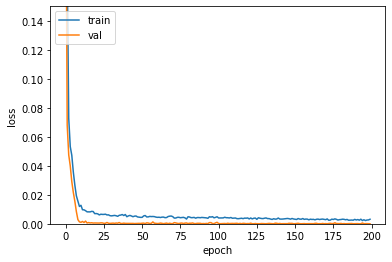

In [17]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 모델 평가하기

In [18]:
trainScore = model2.evaluate(x_train, y_train)
print('Train Score: ', trainScore)
valScore = model2.evaluate(x_val, y_val)
print('Validataion Score: ', valScore)
testScore = model2.evaluate(x_test, y_test)
print('Test Score: ', testScore)

760/760 [==============================] - 0s 412us/step
Train Score:  2.017898680749472e-05
360/360 [==============================] - 0s 416us/step
Validataion Score:  2.002985618471737e-05
360/360 [==============================] - 0s 452us/step
Test Score:  2.002985618471737e-05


### 모델 사용하기

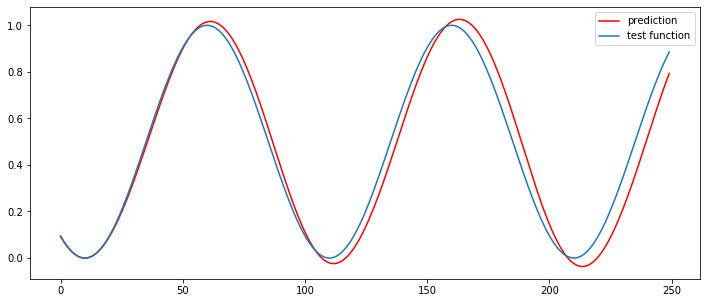

In [19]:
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead, 1))
for i in range(look_ahead):
    prediction = model2.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:], prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead), predictions, 'r', label='prediction')
plt.plot(np.arange(look_ahead), y_test[:look_ahead], label='test function')
plt.legend()
plt.show()

## 3. 상태유지 순환신경망 모델

In [20]:
import keras
class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))

### 모델 처리

In [21]:
model3 = Sequential()
model3.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True))
model3.add(Dropout(0.3))
model3.add(Dense(1))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (1, 32)                   4352      
_________________________________________________________________
dropout_5 (Dropout)          (1, 32)                   0         
_________________________________________________________________
dense_6 (Dense)              (1, 1)                    33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [22]:
model3.compile(loss='mean_squared_error', optimizer='adam')

In [27]:
hist3 = CustomHistory()
hist3.init()

for i in range(20):
    model3.fit(x_train, y_train, epochs=1, batch_size=1, shuffle=False, 
               validation_data=(x_val, y_val), callbacks=[hist3])
    model3.reset_states()

Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 60s 78ms/step - loss: 0.0026 - val_loss: 2.7233e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 60s 79ms/step - loss: 0.0026 - val_loss: 2.7072e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 68s 90ms/step - loss: 0.0025 - val_loss: 0.0029
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 53s 70ms/step - loss: 0.0032 - val_loss: 8.6823e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 54s 71ms/step - loss: 0.0028 - val_loss: 6.2159e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 56s 73ms/step - loss: 0.0023 - val_loss: 1.6734e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] -

### 학습과정 살펴보기

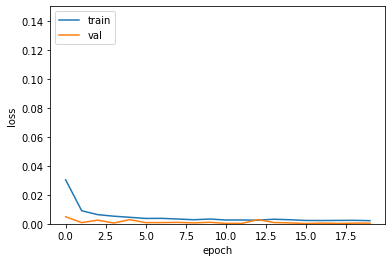

In [28]:
plt.plot(hist3.train_loss)
plt.plot(hist3.val_loss)
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 모델 평가하기

In [29]:
trainScore = model3.evaluate(x_train, y_train, batch_size=1)
model3.reset_states()
print('Train Score: ', trainScore)
valScore = model3.evaluate(x_val, y_val, batch_size=1)
model3.reset_states()
print('Validataion Score: ', valScore)
testScore = model3.evaluate(x_test, y_test, batch_size=1)
model3.reset_states()
print('Test Score: ', testScore)

760/760 [==============================] - 24s 32ms/step
Train Score:  0.0004290362492919317
360/360 [==============================] - 12s 32ms/step
Validataion Score:  0.00043796430309599703
360/360 [==============================] - 11s 31ms/step
Test Score:  0.00043796430309599703


### 모델 사용하기

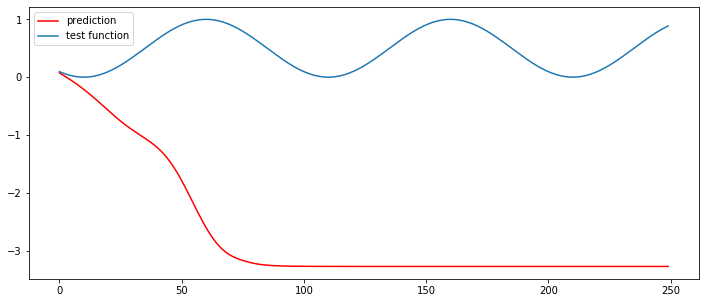

In [30]:
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead, 1))
for i in range(look_ahead):
    prediction = model3.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:], prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead), predictions, 'r', label='prediction')
plt.plot(np.arange(look_ahead), y_test[:look_ahead], label='test function')
plt.legend()
plt.show()

## 4. 상태유지 스택 순환신경망 모델

### 모델 처리

In [31]:
model4 = Sequential()
for i in range(2):
    model4.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True, return_sequences=True))
    model4.add(Dropout(0.3))
model4.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True))
model4.add(Dropout(0.3))
model4.add(Dense(1))
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (1, 40, 32)               4352      
_________________________________________________________________
dropout_6 (Dropout)          (1, 40, 32)               0         
_________________________________________________________________
lstm_4 (LSTM)                (1, 40, 32)               8320      
_________________________________________________________________
dropout_7 (Dropout)          (1, 40, 32)               0         
_________________________________________________________________
lstm_5 (LSTM)                (1, 32)                   8320      
_________________________________________________________________
dropout_8 (Dropout)          (1, 32)                   0         
_________________________________________________________________
dense_7 (Dense)              (1, 1)                   

In [32]:
model4.compile(loss='mean_squared_error', optimizer='adam')

In [33]:
hist4 = CustomHistory()
hist4.init()

In [34]:
for i in range(10):    # 200
    model4.fit(x_train, y_train, epochs=1, batch_size=1, shuffle=False, 
               validation_data=(x_val, y_val), callbacks=[hist4])
    model4.reset_states()

Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 178s 234ms/step - loss: 0.0835 - val_loss: 0.0564
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 243s 320ms/step - loss: 0.0416 - val_loss: 0.0170
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 191s 252ms/step - loss: 0.0173 - val_loss: 0.0105
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 184s 242ms/step - loss: 0.0097 - val_loss: 0.0069
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 186s 245ms/step - loss: 0.0129 - val_loss: 0.0093
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 187s 246ms/step - loss: 0.0083 - val_loss: 0.0622
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 194s 25

### 학습과정 살펴보기

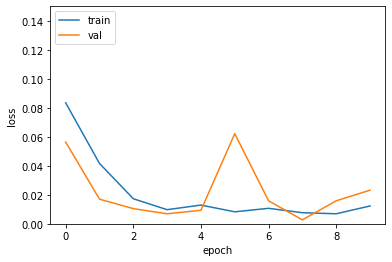

In [35]:
plt.plot(hist4.train_loss)
plt.plot(hist4.val_loss)
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 모델 평가하기

In [36]:
trainScore = model4.evaluate(x_train, y_train, batch_size=1)
model4.reset_states()
print('Train Score: ', trainScore)
valScore = model4.evaluate(x_val, y_val, batch_size=1)
model4.reset_states()
print('Validataion Score: ', valScore)
testScore = model4.evaluate(x_test, y_test, batch_size=1)
model4.reset_states()
print('Test Score: ', testScore)

760/760 [==============================] - 68s 89ms/step
Train Score:  0.022970153052899962
360/360 [==============================] - 32s 89ms/step
Validataion Score:  0.023185484075464856
360/360 [==============================] - 33s 90ms/step
Test Score:  0.023185484075464856


### 모델 사용하기

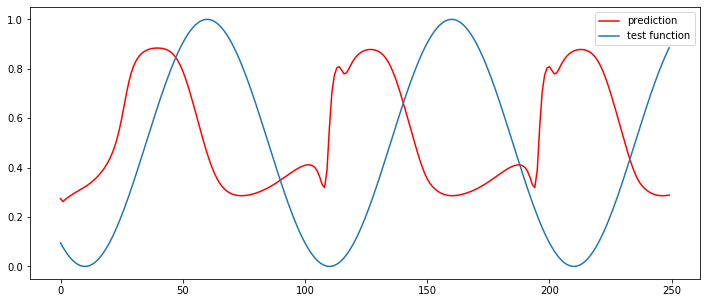

In [37]:
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead, 1))
for i in range(look_ahead):
    prediction = model4.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:], prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead), predictions, 'r', label='prediction')
plt.plot(np.arange(look_ahead), y_test[:look_ahead], label='test function')
plt.legend()
plt.show()